### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import collections
import re
import nltk
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from scipy import spatial
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn import linear_model
from sklearn.feature_selection import RFE
from sklearn.feature_selection import SelectFromModel
import plotly.plotly as py
import plotly.graph_objs as go
from matplotlib.font_manager import FontProperties
import time
from numpy import array
from sklearn.model_selection import KFold
from sklearn.model_selection import GroupKFold
from sklearn.svm import SVR

### Importing Data

In [2]:
pd.set_option('display.max_colwidth', -1)
data=pd.read_csv('Task11Data.csv')
data.head(5) #Start Data

,Tweets,FineGradientScore
0,The happy song does not invoke good feelings. It's actually quite extremely annoying. #irony,-4
1,Having to run to the train first thing in the morning is a great way to start the day #not,-2
2,@OmniJerBear haha should have had #sarcasm at the end,-1
3,@YouknowRilynn #not a creep-You never reply. Sounds like a productive day!- have a Great Fun Day Sunday!-no guilt trip-I chirp about it al!,-1
4,I love how my mom says she can count on Rion more than me. #not #jealous,-2


In [3]:
data.tail(5) #End Data

,Tweets,FineGradientScore
5193,love doing favors for my family and getting no thanks 😍😍😍😍 #not,-3
5194,"Hang on, she wants planes bringing foreigners into the area as it could bring economic benefits #UKIP #BBCQT #irony",-3
5195,I really hope CP3 can stop Westbrook soon. This is getting embarrassing. Doc should take a timeout. #sarcasm @LAClippers,-4
5196,So stoked to hear the boos in Montreal when chara touches the puck for a hit that's 3 years old and counting. #sarcasm,-2
5197,I just love working for 6.5 hours without a break or anything. Especially when I'm on my period and have awful cramps. #NOT,-4


In [4]:
data['FineGradientScore'].dtype

dtype('int64')

### Analsyis of FineGradientScore

In [5]:
FineGradientScore=np.array(data['FineGradientScore'])
print('The Mean Score of Fine Gradient Score is ',round(np.mean(FineGradientScore),2))

The Mean Score of Fine Gradient Score is  -1.96


In [6]:
print('The Mean Score of Fine Gradient Score is ',round(np.median(FineGradientScore),2))

The Mean Score of Fine Gradient Score is  -2.0


###### Fine Gradient Score vs Index

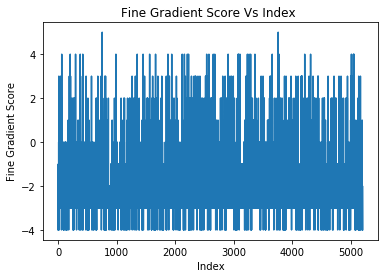

In [7]:
x=[x for x in range(len(FineGradientScore))]
plt.plot(x,FineGradientScore)
plt.xlabel('Index')
plt.ylabel('Fine Gradient Score')
plt.title('Fine Gradient Score Vs Index ')
plt.show()

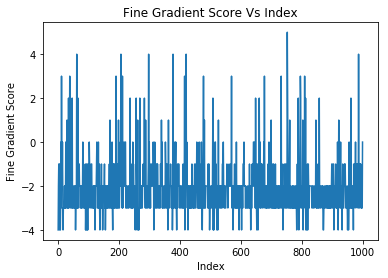

In [8]:
x=[x for x in range(1000)]
plt.plot(x,FineGradientScore[0:1000])
plt.xlabel('Index')
plt.ylabel('Fine Gradient Score')
plt.title('Fine Gradient Score Vs Index')
plt.show()

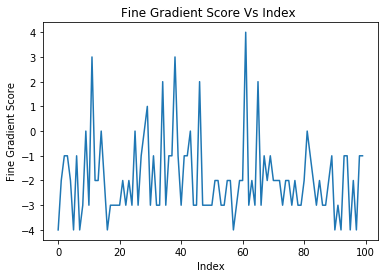

In [9]:
x=[x for x in range(100)]
plt.plot(x,FineGradientScore[0:100])
plt.xlabel('Index')
plt.ylabel('Fine Gradient Score')
plt.title('Fine Gradient Score Vs Index ')
plt.show()

In [10]:
MaxScore=np.max(FineGradientScore)
MinScore=np.min(FineGradientScore)
print('The Maximum Fine Gradient Score is : ',MaxScore)
print('The Minimum Fine Gradient Score is : ',MinScore)

The Maximum Fine Gradient Score is :  5
The Minimum Fine Gradient Score is :  -4


In [11]:
#Let's make a dictionary of the number of gradient scores beloning to partiular score
Count={}
for i in range(len(FineGradientScore)):
    a=FineGradientScore[i]
    if FineGradientScore[i] in Count.keys():
        Count[FineGradientScore[i]]=Count[FineGradientScore[i]]+1
    else:
        Count[FineGradientScore[i]]=1

#To sort the dictionary by Key Values
CountSorted = collections.OrderedDict(sorted(Count.items()))

#To convert the values of key from Odict Values to Int Values
CountSorted = dict((k,int(v)) for k,v in CountSorted.items())

###### Bar Graph

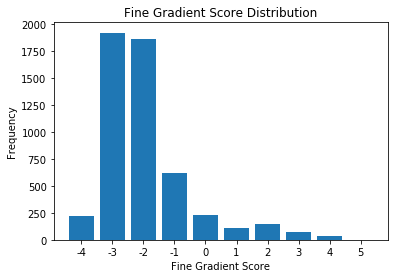

In [12]:
Keys=CountSorted.keys()

Values=[]
for i in range(len(Keys)):
    Values.append(CountSorted[i-4])
    
Values=np.array(Values)

x=np.arange(len(Values))
plt.bar(x,Values)
plt.xticks(x,Keys,label='Fine Gradient Score')
plt.ylabel('Frequency')
plt.xlabel('Fine Gradient Score')
plt.title('Fine Gradient Score Distribution')
plt.show()

###### Pie Chart for each gradient score

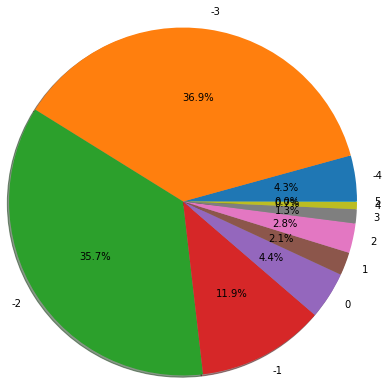

In [13]:
Values=np.array(Values)
Labels=["-4","-3","-2","-1","0","1","2","3","4","5"]
plt.axis("equal")
plt.pie(Values,labels=Labels, shadow=True, autopct='%1.1f%%',radius=2)
plt.show()

###### Negative  Vs Netural Vs Positive Gradient Score

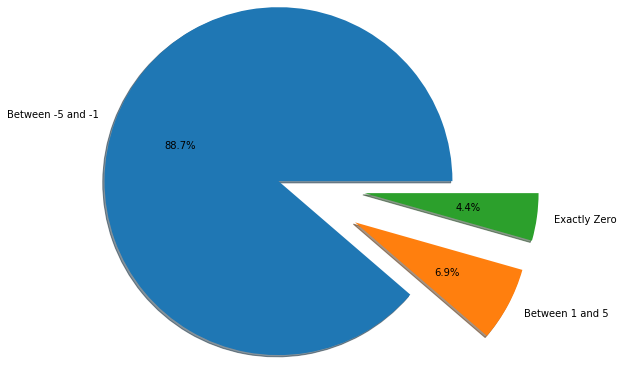

In [14]:
negative=0
positive=0
neutral=0
for i in range(len(FineGradientScore)):
    if FineGradientScore[i] <= -1 :
        negative=negative+1
    elif FineGradientScore[i]==0 :
        neutral=neutral+1
    else:
        positive=positive+1
     
Values=[negative,positive,neutral]
Labels=["Between -5 and -1","Between 1 and 5","Exactly Zero"]
plt.axis("equal")
plt.title("")
plt.pie(Values,labels=Labels, shadow=True, autopct='%1.1f%%',radius=2,explode=[0,1,1])
plt.show()       

In [15]:
data.head(10)

,Tweets,FineGradientScore
0,The happy song does not invoke good feelings. It's actually quite extremely annoying. #irony,-4
1,Having to run to the train first thing in the morning is a great way to start the day #not,-2
2,@OmniJerBear haha should have had #sarcasm at the end,-1
3,@YouknowRilynn #not a creep-You never reply. Sounds like a productive day!- have a Great Fun Day Sunday!-no guilt trip-I chirp about it al!,-1
4,I love how my mom says she can count on Rion more than me. #not #jealous,-2
5,Just noted that there's a big 'C' above @piersmorgan on #BBCQT #irony,-4
6,Hmm... #imaginethat Its a truck race w #kybu n the field&he wins it. #surprisesurprise #not! Hes singlehandedly makin me less&less a fan.,-1
7,"Question, why must people SUCK at doing the tasks they are assigned? Do they assume I enjoy going back and correcting everything? #Not ✋",-4
8,"Literally, I'm about to offer up my first born child just to the stress gods. #breakingdown #gradschool #finals #happybirthday #not",-3
9,It was so nice of my dad to come to my graduation party. #not,0


### Preprocessing the Tweets

In [16]:
modified_tweets=[]
for index,row in data.iterrows():
    
    #To remove @AnyName from the tweets
    row[0]=re.sub(r"@[a-zA-z0-9]*\s+","",row[0]) 
    row[0]=re.sub(r"@[a-zA-z0-9]*:","",row[0])
    row[0]=re.sub(r"@[a-zA-z0-9]*","",row[0])  
    row[0]=re.sub(r"@[a-zA-z0-9]*$","",row[0])
    
    #To remove links
    row[0]=re.sub(r"^https://t.co/[a-zA-Z0-9]*\s+"," ",row[0])    
    row[0]=re.sub(r"\s+https://t.co/[a-zA-Z0-9]*\s+"," ",row[0])  
    row[0]=re.sub(r"\s+https://t.co/[a-zA-Z0-9]*$"," ",row[0])    
    
    #To Convert all the tweets to low.
    row[0]=row[0].lower() 
    
    #To remove the shorthands
    row[0]=re.sub(r"that's","that is ",row[0])
    row[0]=re.sub(r"there's","there is ",row[0])
    row[0]=re.sub(r"what's","what is ",row[0])
    row[0]=re.sub(r"where's","where is ",row[0])
    row[0]=re.sub(r"it's","it is ",row[0])
    row[0]=re.sub(r"who's","who is ",row[0])
    row[0]=re.sub(r"i'm","i am ",row[0])
    row[0]=re.sub(r"she's","she is ",row[0])
    row[0]=re.sub(r"he's","he is ",row[0])
    row[0]=re.sub(r"they're","they are ",row[0])
    row[0]=re.sub(r"who're","who are ",row[0])
    row[0]=re.sub(r"ain't","am not ",row[0])
    row[0]=re.sub(r"wouldn't","would not ",row[0])
    row[0]=re.sub(r"shouldn't","should not ",row[0])
    row[0]=re.sub(r"can't","cannot ",row[0])
    row[0]=re.sub(r"couldn't","could not ",row[0])
    row[0]=re.sub(r"won't","will not ",row[0])
    
    #To remove the single character
    row[0]=re.sub(r"\s+[a-z]\s+"," ",row[0])
    row[0]=re.sub(r"\s+[a-z]$"," ",row[0])
    row[0]=re.sub(r"^[a-z]\s+"," ",row[0])
    
    #To remove non-word character
    row[0]=re.sub(r"^[「人間はいわば感情に左右される生き物である」]*\s+"," ",row[0])
    row[0]=re.sub(r"\s+[「人間はいわば感情に左右される生き物である」]*\s+"," ",row[0])
    row[0]=re.sub(r"\s+[「人間はいわば感情に左右される生き物である」]*$"," ",row[0])
    row[0]=re.sub(r"[!@$,%^&*\"><]*","",row[0])
    row[0]=re.sub(r"\."," ",row[0])
    
    #To remove duplicate spaces
    row[0]=re.sub(r"\s+"," ",row[0])
    
    #To remove digits 
    row[0]=re.sub(r"\d"," ",row[0])
    
    #To remove non-word characters
    row[0]=re.sub(r"\W"," ",row[0])
    
    #To Remove StopWords
    stop_words = set(stopwords.words('english'))
    stop_words.add('#')
    stop_words.remove('not')
    word_tokens = word_tokenize(row[0]) 
    filtered_sentence = [] 
    filtered_sentence = [w for w in word_tokens if not w in stop_words] 
            
    new_sentence=' '.join(filtered_sentence)       
    modified_tweets.append(new_sentence)

In [17]:
d = pd.DataFrame({'Modified_Tweets':modified_tweets})
data['Modified_Tweets']=d['Modified_Tweets']
data.head(10)

,Tweets,FineGradientScore,Modified_Tweets
0,The happy song does not invoke good feelings. It's actually quite extremely annoying. #irony,-4,happy song not invoke good feelings actually quite extremely annoying irony
1,Having to run to the train first thing in the morning is a great way to start the day #not,-2,run train first thing morning great way start day not
2,@OmniJerBear haha should have had #sarcasm at the end,-1,haha sarcasm end
3,@YouknowRilynn #not a creep-You never reply. Sounds like a productive day!- have a Great Fun Day Sunday!-no guilt trip-I chirp about it al!,-1,not creep never reply sounds like productive day great fun day sunday guilt trip chirp al
4,I love how my mom says she can count on Rion more than me. #not #jealous,-2,love mom says count rion not jealous
5,Just noted that there's a big 'C' above @piersmorgan on #BBCQT #irony,-4,noted big c bbcqt irony
6,Hmm... #imaginethat Its a truck race w #kybu n the field&he wins it. #surprisesurprise #not! Hes singlehandedly makin me less&less a fan.,-1,hmm imaginethat truck race kybu fieldhe wins surprisesurprise not hes singlehandedly makin lessless fan
7,"Question, why must people SUCK at doing the tasks they are assigned? Do they assume I enjoy going back and correcting everything? #Not ✋",-4,question must people suck tasks assigned assume enjoy going back correcting everything not
8,"Literally, I'm about to offer up my first born child just to the stress gods. #breakingdown #gradschool #finals #happybirthday #not",-3,literally offer first born child stress gods breakingdown gradschool finals happybirthday not
9,It was so nice of my dad to come to my graduation party. #not,0,nice dad come graduation party not


### Let's Reshape our Pandas Data Frame. So, Our final dataset looks like :

In [18]:
del data['Tweets']
data['FineGScore']=data['FineGradientScore']
del data['FineGradientScore']
data['FineGradientScore']=data['FineGScore']
del data['FineGScore']
data.head(10)

,Modified_Tweets,FineGradientScore
0,happy song not invoke good feelings actually quite extremely annoying irony,-4
1,run train first thing morning great way start day not,-2
2,haha sarcasm end,-1
3,not creep never reply sounds like productive day great fun day sunday guilt trip chirp al,-1
4,love mom says count rion not jealous,-2
5,noted big c bbcqt irony,-4
6,hmm imaginethat truck race kybu fieldhe wins surprisesurprise not hes singlehandedly makin lessless fan,-1
7,question must people suck tasks assigned assume enjoy going back correcting everything not,-4
8,literally offer first born child stress gods breakingdown gradschool finals happybirthday not,-3
9,nice dad come graduation party not,0


### Converting Modified_Tweets into Features using TF-IDF Vectorizer

In [19]:
vectorizer = TfidfVectorizer()
X=vectorizer.fit_transform(data['Modified_Tweets']).toarray()

In [20]:
features=vectorizer.get_feature_names()
for i in range(len(features)):
    print(features[i])

_sw
aa
aaaaallllllmosttttt
aaaaand
aaaah
aagadu
aagain
aap
aapl
aaron
aarons
aaya
ab
abandoned
abandonment
abbas
abbey
abdelbomb
abdl
abducted
abercrombie
abig
ability
ablast
able
abolitionist
aboriginals
abortion
abr
abroad
abs
absence
absolute
absolutely
absolutly
abstract
abt
abundance
abuse
abusers
ac
academy
acc
accept
access
accessibility
accessible
acche
accident
accidentally
accidents
accomplished
accomplishments
according
accordingly
account
accountability
accounts
accuma
accurate
accusations
accused
accuses
accusing
ache
aches
achievements
achievemnt
achilles
achy
acinderellastory
acknowldge
acknowledge
acne
acoustic
acquire
across
act
acted
acting
actingtalent
action
actionpl
actions
active
actively
activision
activism
activist
actor
actors
actress
actual
actually
actuly
ad
adams
add
added
addict
addicted
addictions
adding
addition
address
adds
adele
adequately
adhd
adhering
adidas
adjunct
admerica
admiring
admit
admits
admitted
admonishment
adopting
adorable
adrian
ads
adul

butiwillberich
butreallyitwasdelicious
butseriously
butstilllegal
butt
butter
butterflies
butthatbeatdoe
butthurt
button
butts
buy
buyers
buyin
buying
buzzfeed
bvfunifchu
bvk
bwahhahaha
bwcumc
bx
bxcby
bxtd
bye
byebye
byeeeeee
byefelicia
byethen
bylsma
byru
byu
bz
bzqteirrie
bæ
ca
cab
cabal
cabella
cabinet
cabinets
cable
cabs
caedchat
cafe
cafeterias
caffeine
cafu
cage
cages
cahill
cake
calculus
caleb
california
californiachrome
californians
call
called
callin
calling
callme
callofduty
callon
calls
calm
calmed
calming
cam
came
camera
cameraman
cameron
camo
camp
campaign
campaigning
campfield
camping
campl
camps
campus
canada
canadian
canadians
canadiensmontreal
canal
cancel
canceled
cancelhannibal
canceling
cancelled
cancer
cancerinapot
candidate
candidates
candles
candy
candyman
caned
canned
cannt
cant
cantdeal
canthanganymore
cantsleep
canttell
cantwait
cantwaitfornextseason
canucks
canucksnation
canyousayyeeyee
canyouseethelight
cap
cape
capital
capitalism
capitalize
cappuccinos
cap

cz
da
dad
dadailyinsult
daddy
dadisanarse
dads
daemons
daft
daggady
dai
daily
dailybrew
dailycaller
dailykos
daisy
dalit
dallas
dallasmavs
dallasnews
damascus
dammit
damn
damnthathurt
damnwhy
damon
dan
dana
dance
danced
dancer
dances
dancing
dandy
danes
dang
dangerous
dangerously
dangerzone
dani
daniel
danjon
danny
dante
darduthtahai
dare
darija
dark
darkcoin
darker
darkest
darkgardencorsetry
darkhorse
darkness
darkshine
darkside
darkskin
darling
darn
dat
data
date
dated
dates
datfufushitiaintwidit
dating
dats
daughter
dav
dave
davenport
david
davido
davis
dawn
dawned
day
daycare
dayoff
days
dayy
dc
dd
ddxrz
de
dead
deadexcited
deadlines
deadly
deadspin
deaf
deal
dealer
dealing
deals
dealwithit
dean
dear
death
debit
debs
debt
debut
decade
decades
decapitated
decapitilize
decency
decent
deception
decide
decided
decides
deciding
decision
decisions
decisionsdecisions
deck
declaration
declared
decoration
decreed
dedans
dedicated
dee
deed
deep
deeper
deer
deez
def
defeat
defeated
defence
de

karate
kardashian
kardashiankollection
kare
karma
karting
kashmirh
kashmiris
kate
kathleenwynne
katie
katju
katniss
katy
kayak
kayaks
kaylin
kb
kbs
kbye
kc
kcmv
kcq
kcr
kd
kdixledo
kdtxm
ke
keen
keenan
keep
keeper
keeping
keepmehereforever
keeprockin
keeps
keepsomestuffprivate
keithurban
kelley
kelly
kemp
kenbarlow
kendall
kendra
kendrick
kennel
kennesaw
kenny
kept
kernels
kerry
keselowski
kesler
kettle
kevin
kewl
key
keyboard
keynote
keys
kfc
kfpb
kg
kgikveqkmy
khammam
khelne
khloe
khvosgr
ki
kick
kicked
kickfire
kicking
kickitout
kickmewhenimdown
kicks
kid
kidding
kiddos
kidnapping
kids
kidsonholiday
kidz
kill
killed
killing
killmenow
kills
kilter
kim
kimyewedding
kind
kinda
kindapeople
kindergarten
kindest
kindle
kindof
kinds
king
kingdom
kingedwards
kingofcramping
kings
kingsley
kingston
kirkcaldy
kiss
kisser
kit
kitchen
kitkat
kitsmlteuc
kitten
kj
kjva
kk
kkk
kkr
klaus
klein
kljd
km
knack
knackered
knackers
knaresborough
knee
knees
knew
knight
knitting
kno
knob
knock
knocked
knock

partytime
pass
passed
passenger
passing
passion
passionate
passions
passport
passthatshit
password
past
pasta
pastime
pastoral
pat
patent
path
pathetic
patient
patiently
patients
patio
patrick
patriots
patroit
patron
pattern
paul
pause
pauses
pavement
pawned
pay
paycheck
paychecks
payed
paying
payment
payroll
pays
pb
pbr
pc
pcbdg
peace
peaceful
peachy
peaks
peanut
peas
peat
pedicure
pedo
pee
peed
peeing
peeling
peeps
penalty
penguins
penis
penist
pens
penthouse
people
pepsi
pepsiipl
per
percent
percentage
perf
perfect
perfectcampaigning
perfected
perfection
perfectlogic
perfectly
perfectlytimed
perfecttiming
perform
performance
performances
performed
performer
performing
perhaps
period
periods
perk
perks
perksofbeingagraber
perksofgoingthroughpubertyin
permanent
perphiral
perry
person
persona
personal
personality
personally
perspective
persuade
peru
perv
pervert
pesky
peta
pete
petition
petty
pfffff
pfft
pfm
phallic
phase
phenomenal
phil
philipp
philippines
phillies
phillips
philosophi

resources
respect
respectful
respond
responds
response
responses
responsibilities
responsibility
responsible
ressurection
rest
restarted
restaurant
restaurants
restless
restlessness
restrain
restroom
result
results
resume
retardant
retards
retarted
reteach
rethink
retire
retirement
return
returning
returns
retweet
retweeted
retweeting
retweets
reunion
reus
reuters
rev
revealed
revelstoke
revengeofthefifth
revenues
revered
reverse
review
reviewing
reviews
reviled
revines
revising
revision
revolves
revolving
revved
reward
rey
rg
rhanpf
rhccbrdcfg
rhcjjyrkli
rhinos
rhqbrok
rhyming
rhz
ri
ribfestproblems
rican
rice
rich
richer
richest
rick
rickie
rickshaw
ricky
rid
riddance
ridden
ride
ridertownusa
ridge
ridiculously
riding
riegry
rifle
right
righted
rightful
rights
rightswipe
rigorous
rihan
rims
ring
ringside
rinse
rion
riot
rip
ripa
ripalex
ripbobby
ripcuzzo
ripoff
ripped
ripping
rise
riseandgrind
rises
rising
risk
risky
rispfail
risquehsyearbooknames
rita
rite
ritual
rivals
river
riveti

viralnovelty
virgin
virginity
virmani
virtually
virtues
virus
visible
visibly
vision
visionaries
visit
visiting
visits
vistory
vizpoem
vkmrddalkj
vky
vm
vmoon
vn
vni
vo
voanews
vocabulary
voice
voicemail
voices
void
volleyball
volume
volvo
vomit
vonnegut
vote
voted
voter
voters
votes
voting
voxer
vpjnc
vpn
vs
vsp
vu
vw
vwfc
vxdwgfneby
vyputei
vía
waaaay
waaay
wabas
wacky
wade
wage
wagga
wagon
waikato
waist
waisted
wait
waited
waiting
waitingforhockey
waitressproblems
wake
wakeup
waking
wakingup
walang
walb
wales
walgreens
wali
walk
walked
walking
walkofshame
walks
wall
wallander
wallet
walls
wally
walmart
walsham
walter
walters
wan
wana
wanderer
wandies
wanked
wanker
wankers
wanky
wannabes
want
wanted
wanting
wantmyjob
wants
wanttobetherealready
war
warcraft
ward
warfare
warm
warming
warn
warning
warped
warrington
warrior
warriors
wars
warwick
wasagooddaytilllater
wash
washed
washer
washes
washing
washington
washingtonpost
wasnt
wasp
wasps
waste
wasted
wasteofmoney
wasthisagoodidea
wat

In [21]:
print("The shape of X is : ",X.shape)
print("There are ",X.shape[1]," features")
print("In ",X.shape[0]," Documents")

The shape of X is :  (5198, 11538)
There are  11538  features
In  5198  Documents


##### Converting the 2-D numpy array to Pandas for Feature Selection

In [22]:
new_data=pd.DataFrame(X)
target_data=data['FineGradientScore']

#### Accuracy Calculator

In [23]:
def get_score(pred,y_test):
    pred = np.array(pred)
    y_test = np.array(y_test)
    if(len(pred) != len(y_test)):
        return float("-inf")
    s = 0
    n = len(pred)
    for i in range(0,n):
        s += abs(pred[i]-y_test[i]) # total error
#     print(s)
    mean_error = s/(10*n) 
#     print(mean_error*100)
    return round(100-(mean_error*100),5)

In [24]:
a = [5,5]
b = [5,0]
print(get_score(a,b))

75.0


### FEATURE REDUCTION - MULTINOMIAL NB


In [25]:
new_gsa_fr = []
new_pso_fr = []
new_ga_fr = []
new_gsa_acc = []
new_pso_acc = []
new_ga_acc = []
new_gsa_time = []
new_pso_time = []
new_ga_time = []

In [133]:
initial_accuracy = []

In [26]:
mnb_feature_reduced = []
mnb_time_taken = []
mnb_accuracy = []

In [27]:
import binary_optimization as opt #import library

In [28]:
kfold = KFold(5,False)
for train, test in kfold.split(new_data):
    X_train=new_data.iloc[train]
    Y_train=target_data[train]
    X_test=new_data.iloc[test]
    Y_test=target_data[test]
    print(X_train.shape)
    print(Y_train.shape)
    print(X_test.shape)
    print(Y_test.shape)
    print("Next")

(4158, 11538)
(4158,)
(1040, 11538)
(1040,)
Next
(4158, 11538)
(4158,)
(1040, 11538)
(1040,)
Next
(4158, 11538)
(4158,)
(1040, 11538)
(1040,)
Next
(4159, 11538)
(4159,)
(1039, 11538)
(1039,)
Next
(4159, 11538)
(4159,)
(1039, 11538)
(1039,)
Next


#### GSA + MMB

In [29]:
%%time
kfold = KFold(5,False)
gsa_fr = []
gsa_acc = []
gsa_time = []
for train, test in kfold.split(new_data):
    X_train=new_data.iloc[train]
    Y_train=target_data[train]
    X_test=new_data.iloc[test]
    Y_test=target_data[test]
    
    class Evaluate:#setting class
        def __init__(self):#set train_data,train_label
            self.tr_x = np.array(X_train)
            self.tr_y = np.array(Y_train)
            self.K = 4
        def evaluate(self,gen):
            """
            Setting of evaluation function.
            Here, the correct answer rate is used.
              anser_label/all_label
            """
            mask = np.array(gen) > 0 # create mask for the selected gene.
            al_data = self.tr_x[:,np.nonzero(mask)[0]] # select the dimension corresponding to mask provided.
            kf = KFold(n_splits=self.K, shuffle=True);s=0 # apply K-Fold value to estimate average score obtained by running learning algorithm
            for tr_ix, te_ix in kf.split(self.tr_x):          
                s += MultinomialNB().fit(al_data[tr_ix],self.tr_y[tr_ix]).score(al_data[te_ix], self.tr_y[te_ix])
                # data is being fit into the model Multinomial Naive Bayes
            return s/self.K
            #↑evaluate with fittness function
        def check_dimentions(self,dim):#check number of all feature
            if dim==None:
                return np.array(features).shape[0]
            else:
                return dim
    
    start=time.time()
    print("Algorithm:\n\t{0}  {1} {2}".format("best_pos","best_val","number_of_1s"))
    s,g,l=opt.BGSA(Eval_Func=Evaluate, n=20, m_i=1, prog = True)#score, gen_list, gen length of 1
    print("BGA:\n\t{0}   {1}  {2}".format("".join(map(str,g)),s,l))  
    
    gsa_s = s
    gsa_g = np.array(g)
    mnb_feature_reduced.append(len(features)-l) 
    gsa_l = l
    gsa_fr.append(len(features)-gsa_l)
    
    # feature reduction GSA
    X_selected_train = X_train.iloc[:,gsa_g==1]
    X_selected_test = X_test.iloc[:,gsa_g==1]

    reg=MultinomialNB()
    reg.fit(X_selected_train,Y_train)
    pred=reg.predict(X_selected_test)
    result = get_score(pred,Y_test)
    print("Accuracy : ",result)
    print("Number of Features : ",gsa_l)
    mnb_accuracy.append(result)
    gsa_acc.append(result)
    end=time.time();
    gsa_time.append(end-start)
    print("Time taken : ", end-start)
new_gsa_fr.append(sum(gsa_fr)/5)
new_gsa_acc.append(sum(gsa_acc)/5)
new_gsa_time.append(sum(gsa_time)/5)
print("Features Reduced: ",round(sum(gsa_fr)/5))
print("Final Accuracy: ",round(sum(gsa_acc)/5,2))
print("Final Time Taken ",round(sum(gsa_time)/5,2))

Algorithm:
	best_pos  best_val number_of_1s


100%|██████████| 1/1 [01:30<00:00, 90.10s/it]


BGA:
	1101100100001010110101111101100101011111111111000010111110001011101101111010110100010011110111010111010111010110101000111111111100011110011101001011100000101010111110011010100011110110111101111011010111001011100011110011011100010101111111111100000011101011011010011111100011111100011000001001111110100010010100010000011101111001000010011001111001100101011101110011111001101111010111111111111101001101111011001111001111010110111011111011011111101101010101111101101100110101000111111110001011010100111010111001010110100110111011111101001011111101000100100111011000110111111011101011111011100101011111111101010000000111111111101100001111110011110100101100011000101101011111111100111100101111010111000101010111100101101110100011100111000101011000111111110100110010001111001110011001010010110110100100100100010101111011111010101010110011011100110010101110100000000110110111111111101111110110101111001000110010111001110110101110101001100110110100111001101111111010001111111111011110011001110111110010

Accuracy :  90.625
Number of Features :  7142
Time taken :  92.58749222755432
Algorithm:
	best_pos  best_val number_of_1s


100%|██████████| 1/1 [01:32<00:00, 92.37s/it]


BGA:
	1011111111011111111111111011101011111110111111110011111111011111111111101011111011111101111111111111111111111111111111101111111111111111111111111111011111101111111111111111111111111111110111111111111011111110111111111011111111101110111111111111111101111011111111101111100110111111101111111111111011111111011101111011101111111111111011111111111111110111111111111111111111111111011111111011111111111111111111111011111111111111111111011111110110111111111011111111111111111111110111111100111111111101101111111111111111010111111101111111101111111111111111101111111110111111111111111111111111111111111111111111111111111111111111110111111111100111111111111111111111111111111011101111111111001111111111111111111101110111111111111111111111111111111111110111111111010111111010111110111111101110111111111001111111110111110111111111111111111111111111101111111111111011111111111111101111110111100111111101111111111111111111110111111111111111111111111111111111111011110111111111111001101111011111111111111111

Accuracy :  90.10577
Number of Features :  10562
Time taken :  94.65373706817627
Algorithm:
	best_pos  best_val number_of_1s


100%|██████████| 1/1 [01:18<00:00, 78.74s/it]


BGA:
	1100111011111111101101111110111111111011111111111111111111111111111111111101011101111111111111011111111110111110101111111100111111111111011111111111110111110111101111111111111111111110111011110111011101111011110011111111111111110111001101110011111111111111111101111111111101111111111100111111001011111111111111111111111111111111111111111111011111111111111011001011111101111111001111111111111110111110111101011111101111110100111101011110111111011111010011110011111011111111111110111111111110101111111101111001110110111111111111111111111111110111111111111011111111101011111111100111010111111110110011111111111111111111101111111111111111110111111111111001111111111111111101111110111111110111111111011110111011110111111111011111111111111011111111111111011011111011101011111011111011111011111111111110110111011101111111110011111011010101111111111101111111111111111011110111111110111111111111111110111101101111111111111110111001111111111111111111111010110011111111110111110111101111111011111111011011

Accuracy :  89.20192
Number of Features :  9965
Time taken :  80.9136803150177
Algorithm:
	best_pos  best_val number_of_1s


100%|██████████| 1/1 [01:47<00:00, 107.36s/it]


BGA:
	0111011011010001000000100100000001110010101110110100000001000101101110110110100010000000000010110001001110110000101000000001000000110011000011100111100110000100010001110001001000000100101000000001000100100111000001101110000010110100010101100010001001111011000000001010010010000001000011000001001001000010000000100010001001000011001000101000001001110000000100010110110010000011000001100010101000000010000110000100100000110000010111100000010100001000101101100000010000000000011010000100100000101000000100010000101100100010001101000000010100001000100000001101111001100110010100001110000100010010001001100000110010101001010010101001010101101000001000100000101110110010111000010110110000000110001000000000000100100010001110011001100010100000101000010101010100000000000011100001000000000100101100100000100100011100101001011000010000000100010000000111100100100010110011000010101101001100110000110001010000111011000001000010001001010010000100110000110010011101101010010110011011000001011000101000001011

Accuracy :  89.40327
Number of Features :  3842
Time taken :  109.5452241897583
Algorithm:
	best_pos  best_val number_of_1s


100%|██████████| 1/1 [01:25<00:00, 85.74s/it]


BGA:
	1111111110111111011110100111011101101111111111101111101011111011111011111000111110011110111010101110111111111100111010011101101101111011100100111110011101110111111011111111111001111001010101111111111001111111111010001011110011011011111011111111001111111111111111111111101011101111110111111111110111110111111110111111011101110111111111110011111111101010111111101110101101111101111100010111111111111111111111111101111101111111111111011111010110110011110101001011110101101111011100110010011011111101111010111111111111101101111101110111101111111111110111111111011110111111111101111111111010111110111010110111110111101101100111011110111111111111111111010101110110111111110011101111111111111110111101001111110111110111111110110010111111011111011011111101011111100001101111011011011011111110011111111011111110110101101010111110110010111111011100010010111100111011111111110111100111110111111011110111111101111111110111101101111101110110011111111111101101011111011111110010101111110111111011111111010111

Accuracy :  89.38402
Number of Features :  8961
Time taken :  88.10978984832764
Features Reduced:  3444
Final Accuracy:  89.74
Final Time Taken  93.16
CPU times: user 8min 40s, sys: 1min 19s, total: 10min
Wall time: 7min 50s


#### PSO+MMB

In [30]:
%%time
kfold = KFold(5,False)
pso_fr = []
pso_acc = []
pso_time = []

for train, test in kfold.split(new_data):
    X_train=new_data.iloc[train]
    Y_train=target_data[train]
    X_test=new_data.iloc[test]
    Y_test=target_data[test]
    
    class Evaluate:#setting class
        def __init__(self):#set train_data,train_label
            self.tr_x = np.array(X_train)
            self.tr_y = np.array(Y_train)
            self.K = 4
        def evaluate(self,gen):
            """
            Setting of evaluation function.
            Here, the correct answer rate is used.
              anser_label/all_label
            """
            mask = np.array(gen) > 0
            al_data = self.tr_x[:,np.nonzero(mask)[0]]
            kf = KFold(n_splits=self.K, shuffle=True);s=0
            for tr_ix, te_ix in kf.split(self.tr_x):          
                s += MultinomialNB().fit(al_data[tr_ix],self.tr_y[tr_ix]).score(al_data[te_ix], self.tr_y[te_ix])
                # data is being fit into the model Multinomial Naive Bayes
            return s/self.K
            #↑evaluate with fittness function
        def check_dimentions(self,dim):#check number of all feature
            if dim==None:
                return np.array(features).shape[0]
            else:
                return dim
        
    start=time.time()
    print("Algorithm:\n\t{0}  {1} {2}".format("best_pos","best_val","number_of_1s"))

    s,g,l=opt.BPSO(Eval_Func=Evaluate, n=20, m_i=1, prog = True)#score, gen_list, gen length of 1
    print("BGA:\n\t{0}   {1}  {2}".format("".join(map(str,g)),s,l))  
    
    pso_s = s
    pso_g = np.array(g)
    mnb_feature_reduced.append(len(features)-l)
    pso_l = l
    pso_fr.append(len(features)-pso_l)
    
    # feature reduction PSO
    X_selected_train = X_train.iloc[:,pso_g==1]
    X_selected_test = X_test.iloc[:,pso_g==1]

    reg=MultinomialNB()
    reg.fit(X_selected_train,Y_train)
    pred=reg.predict(X_selected_test)
    result = get_score(pred,Y_test)
    print("Accuracy : ",result)
    print("Number of Features : ",pso_l)
    mnb_accuracy.append(result)
    pso_acc.append(result)
    end=time.time();
    pso_time.append(end-start)
    print("Time taken : ", end-start)
new_pso_fr.append(sum(pso_fr)/5)
new_pso_acc.append(sum(pso_acc)/5)
new_pso_time.append(sum(pso_time)/5) 
print("Features Reduced : ",round(sum(pso_fr)/5))
print("Final Accuracy: ",round(sum(pso_acc)/5,2))
print("Final Time Taken ",round(sum(pso_time)/5,2))

Algorithm:
	best_pos  best_val number_of_1s


100%|██████████| 1/1 [00:57<00:00, 57.09s/it]


BGA:
	0110010000010010111000000000000000110010010000001000001000000011100001100000101001100000110000000000000000110000100000100011000000000000010010000000000010000100001000100000100010000010010101000000101000100100000100100110001000100010000000100000010010000100100000000011000110110100110000000000110111000000110100000010110000000011111000000000000000010100100000001101000000101011000001000100101010000111110001000110000000100100100010010011000011000000000000100010100001100000000000010000000001100000000000000000001000100001000100100000100000100101000110100100000000001011101001001111001100010000101000101101101001100101000100000001000000000000011001110010010000010000101001010011000000010000000000010100000000110001100000100000110001011010000010000100010110000110000010100000011000001001100101011000011000000000100001101100000001111000000010010000011000000010101000000000111100100001000001000000100101000000001000000000000110101101010100010000101001000001101110010000001000011001000000000010010010

Accuracy :  90.40385
Number of Features :  3123
Time taken :  59.73597812652588
Algorithm:
	best_pos  best_val number_of_1s


100%|██████████| 1/1 [01:22<00:00, 82.82s/it]


BGA:
	1111110111110111101010001101110111001101111111011111111101001001111111111011110111111111010110011110101111011111101111111011001111111111101000111100111011110110111111101100111101111110110011111111001111001111111011111010111111101011111111110111111100111111111111111101101011111110111010110111111111111111111110101011101110101011101111111111110111110111011111111111111101111111110111111110100111111111111111011111011011111110011110101111111111111111110101101111011001110011111110101011111111110101101111111011111101011010111110000111111111111111110111011111111001011111111111111111101101011111111111110111111011111111011011001111111111110111011111111101110101110111110101111111111111111111001101111111110111111111100110111100111111101101011011111011111011111111111011100111010111110110111100110111100011111110101011110011111111101111101111111111111111111011111111111111111110111000111011101111001111111100111111111111011111111111111101111111111100110101111011011000110100111111000110101101110111

Accuracy :  90.125
Number of Features :  8996
Time taken :  85.61688709259033
Algorithm:
	best_pos  best_val number_of_1s


100%|██████████| 1/1 [01:16<00:00, 76.87s/it]


BGA:
	1111110011110101110100111111011111001111110001101001110111011111111111111101010001111001101101111000111011111111011111110110101000111111011100001100111001110100101111011110111111111011011110001111001000101010111011001010111111111101001011111110011000000011000011111111101011011111011111001101111010101000000111110100110101011111111110011011111011110110000010101101101010111010101101110101011111100111011001111010011110111111110011111111001001001110110011101011011111110111100110111111111001110100111110010010101111101000111001110110001010110001101011111101111111110100111110010101101101011000110011100100100011011111110101110100111110100111110111011111001001011101111101011110111101101111000011111111101110111101001111011011101101111100101100110011100011101010111011111010101001101101011111110111001100011111101101011110000110011010011111001111111000111110010111111111110111011110011110010010111011001101101111001110110101111111111011111001101111001111011010010010101111001010111101101011110111

Accuracy :  89.03846
Number of Features :  7663
Time taken :  79.27818489074707
Algorithm:
	best_pos  best_val number_of_1s


100%|██████████| 1/1 [01:18<00:00, 78.74s/it]


BGA:
	0000000000000000000000000000000000000000000000100101000000000001000000010000000000001100000100000000101001110000000000010100100101101000000010000010000000100000000000000000100000010000000000001000000000000000001000001000001000000100011000000000000000000000000000000100000000010000101010000100010010000001000000100000001000100010110000010010000100000001000010000100000101000000000000001000011000000000000000000000011001000000000000000000011011000000000000100000000000110000000000000000001100001110000001000000000001000000100000100100000100010110000000100000000000100000010000000000001000000000001010000101000000010000000000000000100000000001001000000010000000000000100000000110000010001000000100000000100100010100001000001001000000000000000000000000000000000001000000010000100000000010010010000101001000011000000001000101101000100000000000000000000000100010000000001100000000001100001000100000000001001010010000100000000000000000000000001001100010000000000001000001000000000000000000000001001010

Accuracy :  89.23003
Number of Features :  1876
Time taken :  81.2500388622284
Algorithm:
	best_pos  best_val number_of_1s


100%|██████████| 1/1 [01:28<00:00, 88.90s/it]


BGA:
	0011100111111110011011110101111101011111110110101101110100011001001110011011010100010010011101111100111110100110000111101011000011000101011001010111010101110110111111010001101101101100111010100000110110110011100111111111111001111011111101110010111001011111111101011000101011001101111111111101011101111110011101101111000111011110011001010011011101111100001101101010010100111111001111101111100100010001000001010011010101111111010101001100101001111111110100111100011001110011110001111111001101001001110101111101011100111001001010010111100101000110101011110100011010100010111101010111110111110000001101100100010110001011111111010011000101010111101110111110101111111000100101111110101011011011010010111101110011011110111011100111110000010111110110101001110001000010101010011101011001111111001100000011111011101100100001111111101110111011010110001000101101110011011100011011110101000101011110010010010011011001111101111010010011000110111001101100110101100011011101110000000111110001110101101111000111

Accuracy :  89.51877
Number of Features :  6780
Time taken :  91.73690700531006
Features Reduced :  5850
Final Accuracy:  89.66
Final Time Taken  79.52
CPU times: user 7min 31s, sys: 1min 12s, total: 8min 44s
Wall time: 6min 42s


#### GA+MMB

In [31]:
%%time
kfold = KFold(5,False)
ga_fr = []
ga_acc = []
ga_time = []

for train, test in kfold.split(new_data):
    X_train=new_data.iloc[train]
    Y_train=target_data[train]
    X_test=new_data.iloc[test]
    Y_test=target_data[test]
    
    class Evaluate:#setting class
        def __init__(self):#set train_data,train_label
            self.tr_x = np.array(X_train)
            self.tr_y = np.array(Y_train)
            self.K = 4
        def evaluate(self,gen):
            """
            Setting of evaluation function.
            Here, the correct answer rate is used.
              anser_label/all_label
            """
            mask = np.array(gen) > 0
            al_data = self.tr_x[:,np.nonzero(mask)[0]]
            kf = KFold(n_splits=self.K, shuffle=True);s=0
            for tr_ix, te_ix in kf.split(self.tr_x):          
                s += MultinomialNB().fit(al_data[tr_ix],self.tr_y[tr_ix]).score(al_data[te_ix], self.tr_y[te_ix])
                # data is being fit into the model Multinomial Naive Bayes
            return s/self.K
            #↑evaluate with fittness function
        def check_dimentions(self,dim):#check number of all feature
            if dim==None:
                return np.array(features).shape[0]
            else:
                return dim
    start=time.time()
    print("Algorithm:\n\t{0}  {1} {2}".format("best_pos","best_val","number_of_1s"))

    s,g,l=opt.BGA(Eval_Func=Evaluate, n=20, m_i=1, prog = True)#score, gen_list, gen length of 1
    print("BGA:\n\t{0}   {1}  {2}".format("".join(map(str,g)),s,l)) 
    
    ga_s = s
    ga_g = np.array(g)
    mnb_feature_reduced.append(len(features)-l)
    ga_l = l
    ga_fr.append(len(features)-ga_l)
    
    
    # feature reduction GA
    X_selected_train = X_train.iloc[:,ga_g==1]
    X_selected_test = X_test.iloc[:,ga_g==1]

    reg=MultinomialNB()
    reg.fit(X_selected_train,Y_train)
    pred=reg.predict(X_selected_test)
    result = get_score(pred,Y_test)
    print("Accuracy : ",result)
    print("Number of Features : ",ga_l)
    mnb_accuracy.append(result)
    ga_acc.append(result)
    end=time.time();
    ga_time.append(end-start)
    print("Time taken : ", end-start)
new_ga_fr.append(sum(ga_fr)/5)
new_ga_acc.append(sum(ga_acc)/5)
new_ga_time.append(sum(ga_time)/5)    
print("Features Reduced: ",round(sum(ga_fr)/5))
print("Final Accuracy: ",round(sum(ga_acc)/5,2))
print("Final Time Taken ",round(sum(ga_time)/5,2))

Algorithm:
	best_pos  best_val number_of_1s


100%|██████████| 1/1 [01:19<00:00, 79.71s/it]


BGA:
	1110111111111111111111111111101111111111111111111111111111111111111111111111111110111111111111111111111111111111111111111111111111111111111111111111011101111111111111111111111111111111111111111111111111111111110111111111111111111111111111111111111011110101111111111111111111111110111011111101111111111111111011111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111011111101111111110111111111111111111111111111111111111111111101111111111111111101111111011111111011111111111111111111111111111111111111111111111111111111111111111110101111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111101111111111111101111111111111111111111011111111111111111111111111111111111111011111111101111111111111111111111111111111111111111111111101111111111111111111110111011111111111111111111111111111111111111111111111111111111111111111111111

Accuracy :  90.60577
Number of Features :  11129
Time taken :  82.02334403991699
Algorithm:
	best_pos  best_val number_of_1s


100%|██████████| 1/1 [01:18<00:00, 78.55s/it]


BGA:
	1010011111101111110001111110011111101111010001011110110111100001010111100101111010011111111011111111111000111100111010110011101111001110101011011000100101110101111001111111011101111011111100110101000111010110111111100101111111110101001110000011011001111011110111111110111101000010011100111101111101111101101111111011011000111110111101100101000110110001011100011011111111101011101111100101011110111010001111111111011111111111011001010100111011110011111010110111111011101110010010011111110010110100110110011111111111101111110111010111101001110100101101110111111000001101010111101111110001010110111001010110111110111111101100111110100100010001001101111111111110111101111101000001111111000110111101011111010111110001000111001100001111111101101101101101111110110100010010001111100110110110001011011101111111101111111110110110100111001100111111111101011100001000100101011111111000001110110111110110111110011100001011111010011111001111100111110011100101101011101011111011011110011001001011111111111110

Accuracy :  90.16346
Number of Features :  7693
Time taken :  80.65260100364685
Algorithm:
	best_pos  best_val number_of_1s


100%|██████████| 1/1 [00:48<00:00, 48.89s/it]


BGA:
	1010011110111101101101100010111100110110110111111011010001000101111110011101011111001111111111111001111111111101111101100000111110101111110111111011111111110011011011111111011111101111111011111110111110101110111111001111011011011100011111011001001101110000111111100101110111111111111111011111110111111111101111001101101110011110011011101101001111111110110011011101110111111110111111111011110111110110111111111111011011111110111111100111111111101111101110111111010000111111111111101111110101111111001010110111101111111101101111111111111111100011011111011111101111101111111111110111011000111110110101111001110100010111011011010101111111110111111011001111110111011111111111111101111111111111100101011111110111011110100111110111110111111010111100111101111111111011011111111100110110111111111101111101010110100111101110111001011111101110110111111011111111111101010110101101111111111011100111111111111111111101111100110111111101101101110111111011011111011111111101111011111111011010111101010111011011

Accuracy :  88.875
Number of Features :  8957
Time taken :  51.00726890563965
Algorithm:
	best_pos  best_val number_of_1s


100%|██████████| 1/1 [01:12<00:00, 72.56s/it]


BGA:
	0111110101011101111001111100001101110001110101101111010001001011011010110101111101111101111111110111011110110111101110101011111010100101011110011101111100011100001110011100010101111111001011111101111110111111101100010010111111111111001110111111000111111001111100101110111101111111101100111011011001111101101011010100100010111011110111011011111111110110111011111010101100111011011011110011111001110011101010011101111111010100111111011111011101110000110111100111111011110010110111111001110100010100110000011010111111011111001101011011011111101111011101101101111110111101100101100101011011111011011111100101010110111111110111001101011100111110101111111100111000110000010110111001111110110101111110110011111111011111111111011110001101011111111011011110110001111111101111111110001101101110111101011111100011011011111111110101011011100111000011111111010011000101001011001111010111111011010111111111010010011111111000111011000101010001101111111110011101111110011111111100110011110111110111110011100111

Accuracy :  89.64389
Number of Features :  8015
Time taken :  74.36943101882935
Algorithm:
	best_pos  best_val number_of_1s


100%|██████████| 1/1 [01:09<00:00, 69.56s/it]


BGA:
	1111111111111011111010011111101111111111011110011011011110100110111011111001001011111110000111111111111111111111110111101001111000011001010111111100110000111111111111111101110111110111010110000111011111110111110111111110111001011111011111101111111100111111000011111111111010000111110101111010101111111111101111111111111110101111001111110110011110011001001111000111010111111011111111110111111110111101011111111110111001111011111111111101111100111101111110110010011011001111111110111111111011010110111100111110111011101101111111110101111111000000011001111111111010111111110111111101111110001110011101011111101111001011101111001111010110011111001011101111111001110100111001111001001101101101101001110110101101111101011100001111110100111101110111110101011110110111111001111010110111101110111111111111111010001001011110101111011011101111011110110111111101111011011110011100100111011111110111011111110010110101101110111101111111111011111110101111001101101110011101110101110101111011111111111110111011

Accuracy :  89.49952
Number of Features :  8411
Time taken :  71.40148782730103
Features Reduced:  2697
Final Accuracy:  89.76
Final Time Taken  71.89
CPU times: user 6min 58s, sys: 1min 4s, total: 8min 3s
Wall time: 6min 5s


#### NORMAL

In [32]:
%%time
#  normal without feature reduction
reg=MultinomialNB()
reg.fit(X_train,Y_train)
pred=reg.predict(X_test)
result = get_score(pred,Y_test)
print("Accuracy : ",result)
print("Number of Features : ",len(features))

Accuracy :  89.49952
Number of Features :  11538
CPU times: user 335 ms, sys: 19.2 ms, total: 355 ms
Wall time: 184 ms


### FEATURE REDUCTION - Decision Tree


In [33]:
dt_feature_reduced = []
dt_accuracy = []
dt_time = []

#### GSA+DT

In [34]:
%%time
kfold = KFold(5,False)
gsa_fr = []
gsa_acc = []
gsa_time = []

for train, test in kfold.split(new_data):
    X_train=new_data.iloc[train]
    Y_train=target_data[train]
    X_test=new_data.iloc[test]
    Y_test=target_data[test]
    
    class Evaluate:#setting class
        def __init__(self):#set train_data,train_label
            self.tr_x = np.array(X_train)
            self.tr_y = np.array(Y_train)
            self.K = 4
        def evaluate(self,gen):
            """
            Setting of evaluation function.
            Here, the correct answer rate is used.
              anser_label/all_label
            """
            mask = np.array(gen) > 0
            al_data = self.tr_x[:,np.nonzero(mask)[0]]
            kf = KFold(n_splits=self.K, shuffle=True);s=0
            for tr_ix, te_ix in kf.split(self.tr_x):          
                s += DecisionTreeRegressor().fit(al_data[tr_ix],self.tr_y[tr_ix]).score(al_data[te_ix], self.tr_y[te_ix])
                # data is being fit into the model Multinomial Naive Bayes
            return s/self.K
            #↑evaluate with fittness function
        def check_dimentions(self,dim):#check number of all feature
            if dim==None:
                return np.array(features).shape[0]
            else:
                return dim
        
    start=time.time()
    print("Algorithm:\n\t{0}  {1} {2}".format("best_pos","best_val","number_of_1s"))

    s,g,l=opt.BGSA(Eval_Func=Evaluate, n=20, m_i=1, prog = True)#score, gen_list, gen length of 1
    print("BGA:\n\t{0}   {1}  {2}".format("".join(map(str,g)),s,l))  
    
    gsa_dt_s = s
    gsa_dt_g = np.array(g)
    dt_feature_reduced.append(len(features)-l)
    gsa_dt_l = l
    gsa_fr.append(len(features)-gsa_dt_l)
    
    
    # feature reduction GSA
    X_selected_train = X_train.iloc[:,gsa_dt_g==1]
    X_selected_test = X_test.iloc[:,gsa_dt_g==1]

    reg=DecisionTreeRegressor()
    reg.fit(X_selected_train,Y_train)
    pred=reg.predict(X_selected_test)
    result = get_score(pred,Y_test)
    print("Accuracy : ",result)
    print("Number of Features : ",gsa_dt_l)
    dt_accuracy.append(result)
    gsa_acc.append(result)
    end=time.time();
    gsa_time.append(end-start)
    print("Time taken : ", end-start)
new_gsa_fr.append(sum(gsa_fr)/5)
new_gsa_acc.append(sum(gsa_acc)/5)
new_gsa_time.append(sum(gsa_time)/5)
print("Features Reduced: ",round(sum(gsa_fr)/5))
print("Final Accuracy: ",round(sum(gsa_acc)/5,2))
print("Final Time Taken ",round(sum(gsa_time)/5,2))

Algorithm:
	best_pos  best_val number_of_1s


100%|██████████| 1/1 [1:05:30<00:00, 3930.27s/it]


BGA:
	0010000000000000000000000010000000000000000000000000000000000000001000000000000000001000100000000000000000000000000001000000000000000000000000000000000000000000000010000000000000000000000000000000000000000001000000000000000010001000000000000100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000010000000001000000000100000000000000000000000000000000000000000000000000100000000000000000000000000100000000000100000000000010000000000000000000000000000000000000000000000000000010000000100000100100000000010001000000000000000000000000000000000000000001000000001000000000000010000000001100100000000010001000000100000000000000000000000000000000000000000000000000000000000000000000000000000000100000000000000110000100000000000000000000000000000000000000000000000000000000000000000000000000000000000000100000000000000000000000000000000000000000000000001000000000100000000000000000000000000000000000000000000000000000000000000000000000010000001000000000000000100000010

Accuracy :  89.41502
Number of Features :  713
Time taken :  3943.156063079834
Algorithm:
	best_pos  best_val number_of_1s


100%|██████████| 1/1 [1:04:46<00:00, 3886.98s/it]


BGA:
	1010111001100111011001110011111111100001101000100111111111100011101111100111110111100001111111110011101110100001011111010101111111110011001101111111110011110111110010111111110111111010100110010101111010001100111111111010111111011110111011100111111000101100111111110111101111011111110110001010101010001100111111110101101110011011111101111111111010011111111101111100101111011111111111111011111111011111011011110110010100111101100101100100010110100111111011111111011001111101110010111110001111110110111010111011111111010110111111011110110110011011011010110010010111011111111110100101100111101101101100111111111101101111110011110111010111111011111111010100111110111111010111101010111100111111111111011110010001111111001011101111000110011111101111110101111111111111101011100011011110111011101111111101111101111111110101110000101111111100011000010000101110111111100110001111111111111111011110001011111110111111011111111111110101011010100110011111101100110111100110011111001100111111010011000111111110

Accuracy :  89.58654
Number of Features :  8207
Time taken :  3925.9568610191345
Algorithm:
	best_pos  best_val number_of_1s


100%|██████████| 1/1 [54:28<00:00, 3268.01s/it]


BGA:
	0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000010000000000000000000000000000000000000000100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000

Accuracy :  89.96602
Number of Features :  80
Time taken :  3269.9031081199646
Algorithm:
	best_pos  best_val number_of_1s


100%|██████████| 1/1 [1:14:54<00:00, 4494.47s/it]


BGA:
	0000000000100000000010000000000000000000010000000000001000000001010000010000000000000100000000000010001000000000000000000110000000000100000000000010000010000011000000000000000000001001000000000001000000000001000000000000100000000101000000000000001000000000000000100000000101010100000010100000001000000000000000000000000000011000000000000100000100000000000000000000000000010000000000000010000000000000000000000000000000010000000000000100001000000001000000000000000000000000000000000000000000000001000000100000000000000000010001000000000000000000000000100000100000001000000000010100000000000000000000000000001000000100000000000000000000000001000000001000000000000000000000000000000000000000000000000000000000000000000000000100100000000001000000000000000000000000000000100000000000000100000100000000000000000010000010000001000000000000000100100010001000000000000000000000000000000000000000100000000000000100000000010000000000010000000000000000000001000000000000000000000001000100000000000010000000

Accuracy :  89.25026
Number of Features :  792
Time taken :  4510.887899875641
Algorithm:
	best_pos  best_val number_of_1s


100%|██████████| 1/1 [48:10<00:00, 2890.69s/it]


BGA:
	0000000000000000000000000000000000001000000000000000000000000000000000000000000000000000000000000010000000000000000010000000001000000000000000000000000000000000000000000000000000000010000000000000100000000000000000000000000000000001000000000000000000000000000000000000000000000000000000000000000000100000010000000000000000000000000000000000000000001000000000000000000001000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000001000000000000000000000000000000000000001000000000000000000000000000000000000000000000000000010000000000000000000000000000100100001000000000100000000000000000000000000000000000000000000000100000000000000001000000000000000000000000000000000000000000000000000000100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000100000000010000000000000000000000000000000000000000000000000000000000000000000000010000000000000000000000000000000000000100000000000000000000000000000000000010000000

Accuracy :  89.11566
Number of Features :  245
Time taken :  2893.3841660022736
Features Reduced:  9531
Final Accuracy:  89.47
Final Time Taken  3708.66
CPU times: user 5h 6min 15s, sys: 2min 17s, total: 5h 8min 32s
Wall time: 5h 9min 8s


##### PSO+DT

In [35]:
%%time
kfold = KFold(5,False)
pso_fr = []
pso_acc = []
pso_time = []

for train, test in kfold.split(new_data):
    X_train=new_data.iloc[train]
    Y_train=target_data[train]
    X_test=new_data.iloc[test]
    Y_test=target_data[test]
    
    class Evaluate:#setting class
        def __init__(self):#set train_data,train_label
            self.tr_x = np.array(X_train)
            self.tr_y = np.array(Y_train)
            self.K = 4
        def evaluate(self,gen):
            """
            Setting of evaluation function.
            Here, the correct answer rate is used.
              anser_label/all_label
            """
            mask = np.array(gen) > 0
            al_data = self.tr_x[:,np.nonzero(mask)[0]]
            kf = KFold(n_splits=self.K, shuffle=True);s=0
            for tr_ix, te_ix in kf.split(self.tr_x):          
                s += DecisionTreeRegressor().fit(al_data[tr_ix],self.tr_y[tr_ix]).score(al_data[te_ix], self.tr_y[te_ix])
                # data is being fit into the model Multinomial Naive Bayes
            return s/self.K
            #↑evaluate with fittness function
        def check_dimentions(self,dim):#check number of all feature
            if dim==None:
                return np.array(features).shape[0]
            else:
                return dim

    start=time.time()
    print("Algorithm:\n\t{0}  {1} {2}".format("best_pos","best_val","number_of_1s"))

    s,g,l=opt.BPSO(Eval_Func=Evaluate, n=20, m_i=1, prog = True)#score, gen_list, gen length of 1
    print("BGA:\n\t{0}   {1}  {2}".format("".join(map(str,g)),s,l))  
    
    pso_dt_s = s
    pso_dt_g = np.array(g)
    dt_feature_reduced.append(len(features)-l)
    pso_dt_l = l
    pso_fr.append(len(features)-pso_dt_l)
    
    
    # feature reduction PSO
    X_selected_train = X_train.iloc[:,pso_dt_g==1]
    X_selected_test = X_test.iloc[:,pso_dt_g==1]

    reg=DecisionTreeRegressor()
    reg.fit(X_selected_train,Y_train)
    pred=reg.predict(X_selected_test)
    result = get_score(pred,Y_test)
    print("Accuracy : ",result)
    print("Number of Features : ",pso_dt_l)
    dt_accuracy.append(result)
    pso_acc.append(result)
    end=time.time();
    pso_time.append(end-start)
    print("Time taken : ", end-start)
    
new_pso_fr.append(sum(pso_fr)/5)
new_pso_acc.append(sum(pso_acc)/5)
new_pso_time.append(sum(pso_time)/5) 
print("Features Reduced: ",round(sum(pso_fr)/5))
print("Final Accuracy: ",round(sum(pso_acc)/5,2))
print("Final Time Taken ",round(sum(pso_time)/5,2))

Algorithm:
	best_pos  best_val number_of_1s


100%|██████████| 1/1 [1:10:37<00:00, 4237.04s/it]


BGA:
	0101010110110000100101000000110010100000001110011011110101100010001110100100101100101101001110000010110000000010010011100100001111111011101010011101000000100010111010000000110001111100101100101011011101111110011011011010010100010110000101100001010101100010101011110000011100110100000101101110111010100100010000000100001011001101100001010000000000011100100010001111001000100001010000001111001011001000111000010010100111101011101101010011111010001001100101101000000011111110100000000000001000111001011000101111101100001110000000011111111001000111100000001001111000100110100000010111000100100110101011000110001010100001110010010010001111001010110010001010011101011101101001011111101101101010011001100011100110100111000001010000010010100011011110110001010001101010100001111000101100000110101101101110101001100000000111001010101110110110110110000111100010100010101111111000101010110000100000111101011111000100111000110111011001111000101110100010001110001011110101001011011000110101010000000101111010

Accuracy :  89.39306
Number of Features :  5280
Time taken :  4291.419204711914
Algorithm:
	best_pos  best_val number_of_1s


100%|██████████| 1/1 [53:31<00:00, 3211.35s/it]


BGA:
	0000000000000001000000000000000100000000000100000000000000000000000000000000000000000000000000000000000001000100000000000000000000000000000000000000000000000000000010000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000010000000000000001000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000001000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000001000000000000000000000000000000000000000000000000000000000000000000000000000000001000000000000000000000000000000000000000000000000000000000000000000000000001000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000100010000000000000000000010000000000000000000000000000000000000100000

Accuracy :  90.48712
Number of Features :  132
Time taken :  3214.066129922867
Algorithm:
	best_pos  best_val number_of_1s


100%|██████████| 1/1 [47:50<00:00, 2870.00s/it]


BGA:
	0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000001000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000

Accuracy :  90.05861
Number of Features :  19
Time taken :  2872.2962639331818
Algorithm:
	best_pos  best_val number_of_1s


100%|██████████| 1/1 [41:24<00:00, 2484.18s/it]


BGA:
	0000000000000000000000011000100000000000000000000000000000000000001000000000001000000000000000000000000000000000000000000000000000000000000001000000000000000000000000000000000000000000100000000000011000000000000000000000000000000000000000000010000000000000000000000000000000000000000000000000010001000000011000000000000000000000000000000000000000000000000010000000000001000000000000000000000000000010000000000000000010001000000000001000000000000000000000000000000000000100000000000010000000000000001000000001000000000100010000000000000000000110000000000000000000000000000000000100000000000000000000000000000000100000000000000000000000000000000000001000000000000000000000000000000000001000000000000000000000000000000000000000000000000001000000000010000000000000000000000000000000001000000000000000000000000000000000000001000000000100001010000000000000000000000000000000000100000100000000100000000000000001000000000000000000000000001000000000000000000001000000000000000000000110000000000000000000

Accuracy :  89.986
Number of Features :  455
Time taken :  2491.1805667877197
Algorithm:
	best_pos  best_val number_of_1s


100%|██████████| 1/1 [1:14:52<00:00, 4492.21s/it]


BGA:
	1110111100111101111111111101101111111011111111111101111111111111111111111111111111111111101111111111101111111111111111111111110111111110111101111111101101111111111101111111111111101111111111011111101111111111010111111110111101111101111111101011111111101101111100011111111111111111111111110111111111111111111111111011111111111111111011010111111111111111111111111110111111110111110011101011111111111111111011111111111011111011111111111011111111111011111111101111110111110111100111101111111011110001011111111111111111111110101111111111011111110101111111111111111111011111101111111100111111111011111111101111111110111111101110111111111111111111111111111111111111010111111001111111011111111011110111111011011111101110111101111111101010111111111111011110111111111111111111111110111110111111111111110111101111111111111110100111101011111111110111111011011111111001111111111101101111111111011111111111011111111111101111111111101111111111111111111111111111011111111111111111111111101101111111111111101111

Accuracy :  88.81617
Number of Features :  10256
Time taken :  4654.441651105881
Features Reduced:  8310
Final Accuracy:  89.75
Final Time Taken  3504.68
CPU times: user 4h 49min 30s, sys: 2min 12s, total: 4h 51min 43s
Wall time: 4h 52min 8s


#### GA+DT

In [36]:
%%time
kfold = KFold(5,False)
ga_fr = []
ga_acc = []
ga_time = []

for train, test in kfold.split(new_data):
    X_train=new_data.iloc[train]
    Y_train=target_data[train]
    X_test=new_data.iloc[test]
    Y_test=target_data[test]
    
    class Evaluate:#setting class
        def __init__(self):#set train_data,train_label
            self.tr_x = np.array(X_train)
            self.tr_y = np.array(Y_train)
            self.K = 4
        def evaluate(self,gen):
            """
            Setting of evaluation function.
            Here, the correct answer rate is used.
              anser_label/all_label
            """
            mask = np.array(gen) > 0
            al_data = self.tr_x[:,np.nonzero(mask)[0]]
            kf = KFold(n_splits=self.K, shuffle=True);s=0
            for tr_ix, te_ix in kf.split(self.tr_x):          
                s += DecisionTreeRegressor().fit(al_data[tr_ix],self.tr_y[tr_ix]).score(al_data[te_ix], self.tr_y[te_ix])
                # data is being fit into the model Multinomial Naive Bayes
            return s/self.K
            #↑evaluate with fittness function
        def check_dimentions(self,dim):#check number of all feature
            if dim==None:
                return np.array(features).shape[0]
            else:
                return dim
        
    start=time.time()
    print("Algorithm:\n\t{0}  {1} {2}".format("best_pos","best_val","number_of_1s"))

    s,g,l=opt.BGA(Eval_Func=Evaluate, n=20, m_i=1, prog = True)#score, gen_list, gen length of 1
    print("BGA:\n\t{0}   {1}  {2}".format("".join(map(str,g)),s,l)) 
    
    ga_dt_s = s
    ga_dt_g = np.array(g)
    dt_feature_reduced.append(len(features)-l)
    ga_dt_l = l
    ga_fr.append(len(features)-ga_dt_l)
    
    # feature reduction GA
    X_selected_train = X_train.iloc[:,ga_dt_g==1]
    X_selected_test = X_test.iloc[:,ga_dt_g==1]

    reg=DecisionTreeRegressor()
    reg.fit(X_selected_train,Y_train)
    pred=reg.predict(X_selected_test)
    result = get_score(pred,Y_test)
    print("Accuracy : ",result)
    print("Number of Features : ",ga_dt_l)
    dt_accuracy.append(result)
    ga_acc.append(result)
    end=time.time();
    ga_time.append(end-start)
    print("Time taken : ", end-start)
new_ga_fr.append(sum(ga_fr)/5)
new_ga_acc.append(sum(ga_acc)/5)
new_ga_time.append(sum(ga_time)/5)
print("Features Reduced: ",round(sum(ga_fr)/5))
print("Final Accuracy: ",round(sum(ga_acc)/5,2))
print("Final Time Taken ",round(sum(ga_time)/5,2))

Algorithm:
	best_pos  best_val number_of_1s


100%|██████████| 1/1 [1:07:34<00:00, 4054.41s/it]


BGA:
	1111110011001101000010111011111001101110001110110111101111111011011111001111011000010111101111101011111011101111111001111111111100010111011111111111011000101101101001011011101111111000111111110111110101011101001111100111000111010111011101111100101111101111001011101011001111001111111100111111111001011110111010111101101001111110111100101100110110001010111111111011001011111111101101111010110111100110110000011110111111111101010001111010110110111010011111001111111110111111111101111110111111111111111011101001111111010101101011101110001111110111011111111101110101111011110111011101111111111111111101111110111101010111111100110111011111011111111110110101110111111111110111011101011111111111101110110101011111111000111111110111111101101011110110011111101101011001111011011011110011101111111101101010101001111110111101111010101111001101111111101110011101100101110111111111011111111111111011110111011100100110111111011110111110110111101011111111111111011111011100001011111010011111101011011011101110

Accuracy :  88.74519
Number of Features :  8493
Time taken :  4260.366034030914
Algorithm:
	best_pos  best_val number_of_1s


100%|██████████| 1/1 [59:06<00:00, 3546.78s/it]


BGA:
	0000000000000000000001100000000000000000000000000000000000000000000000000000000000000000000000100001000000000000000000100000000000000000000000000010000000000000000010000000000000001000000000000000001000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000001000000000000000000000000000000000000000000000000000001000000010000100000000000000000000000000000100000000000000000000000000000010000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000100000000000000000000000000000000000000000000000000000000000000000000001010000000000000000000000000000000000000000000000000000000000010000000000000000000000000000000000000000000000000000000000000000000000000110000001000000000000000000000000000000000000000000000000000000000100100000001000000000010000000000000000000000000000000000100000000000000000000100000000000000000000000000000000000000000100000000000000000000000010000000000

Accuracy :  89.71909
Number of Features :  500
Time taken :  3553.301232814789
Algorithm:
	best_pos  best_val number_of_1s


100%|██████████| 1/1 [51:54<00:00, 3114.52s/it]


BGA:
	0000000000000000000000000000000000000000000000000000000000000000000000000010000000000000000000000000000000000000000000000000000000000000000100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000100000000100000000000000000000000000000000000010000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000010000000000000000000000000000000000000000000000000000000010000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000010000000000000000000000000000000100

Accuracy :  89.6469
Number of Features :  109
Time taken :  3116.532858848572
Algorithm:
	best_pos  best_val number_of_1s


100%|██████████| 1/1 [51:12<00:00, 3072.38s/it]


BGA:
	0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000

Algorithm:
	best_pos  best_val number_of_1s


100%|██████████| 1/1 [59:11<00:00, 3551.96s/it]


BGA:
	0000000000000000000000010000000000000000000000000000000000000000000000000000000000000010000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000010000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000100000000000010000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000

Accuracy :  89.51218
Number of Features :  54
Time taken :  3553.8395869731903
Features Reduced:  9705
Final Accuracy:  89.64
Final Time Taken  3511.59
CPU times: user 4h 50min 13s, sys: 2min 3s, total: 4h 52min 17s
Wall time: 4h 52min 43s


#### NORMAL - DT

In [37]:
%%time
#  normal without feature reductio
reg=DecisionTreeRegressor()
reg.fit(X_train,Y_train)
pred=reg.predict(X_test)
result = get_score(pred,Y_test)
print("Accuracy : ",result)
print("Number of Features : ",len(features))

Accuracy :  88.56112
Number of Features :  11538
CPU times: user 3min 13s, sys: 620 ms, total: 3min 14s
Wall time: 3min 14s


### FEATURE REDUCTION - SVR

##### GSA+SVR

In [38]:
%%time
kfold = KFold(5,False)
gsa_fr = []
gsa_acc = []
gsa_time = []

for train, test in kfold.split(new_data):
    X_train=new_data.iloc[train]
    Y_train=target_data[train]
    X_test=new_data.iloc[test]
    Y_test=target_data[test]
    
    class Evaluate:#setting class
        def __init__(self):#set train_data,train_label
            self.tr_x = np.array(X_train)
            self.tr_y = np.array(Y_train)
            self.K = 4
        def evaluate(self,gen):
            """
            Setting of evaluation function.
            Here, the correct answer rate is used.
              anser_label/all_label
            """
            mask = np.array(gen) > 0
            al_data = self.tr_x[:,np.nonzero(mask)[0]]
            kf = KFold(n_splits=self.K, shuffle=True);s=0
            for tr_ix, te_ix in kf.split(self.tr_x):          
                s += SVR().fit(al_data[tr_ix],self.tr_y[tr_ix]).score(al_data[te_ix], self.tr_y[te_ix])
                # data is being fit into the model Multinomial Naive Bayes
            return s/self.K
            #↑evaluate with fittness function
        def check_dimentions(self,dim):#check number of all feature
            if dim==None:
                return np.array(features).shape[0]
            else:
                return dim
        
    start=time.time()
    print("Algorithm:\n\t{0}  {1} {2}".format("best_pos","best_val","number_of_1s"))

    s,g,l=opt.BGSA(Eval_Func=Evaluate, n=20, m_i=1, prog = True)#score, gen_list, gen length of 1
    print("BGA:\n\t{0}   {1}  {2}".format("".join(map(str,g)),s,l))  
    
    gsa_dt_s = s
    gsa_dt_g = np.array(g)
    dt_feature_reduced.append(len(features)-l)
    gsa_dt_l = l
    gsa_fr.append(len(features)-gsa_dt_l)
    
    
    # feature reduction GSA
    X_selected_train = X_train.iloc[:,gsa_dt_g==1]
    X_selected_test = X_test.iloc[:,gsa_dt_g==1]

    reg=SVR()
    reg.fit(X_selected_train,Y_train)
    pred=reg.predict(X_selected_test)
    result = get_score(pred,Y_test)
    print("Accuracy : ",result)
    print("Number of Features : ",gsa_dt_l)
    dt_accuracy.append(result)
    gsa_acc.append(result)
    end=time.time();
    gsa_time.append(end-start)
    print("Time taken : ", end-start)
new_gsa_fr.append(sum(gsa_fr)/5)
new_gsa_acc.append(sum(gsa_acc)/5)
new_gsa_time.append(sum(gsa_time)/5)
print("Features Reduced: ",round(sum(gsa_fr)/5))
print("Final Accuracy: ",round(sum(gsa_acc)/5,2))
print("Final Time Taken ",round(sum(gsa_time)/5,2))

Algorithm:
	best_pos  best_val number_of_1s


100%|██████████| 1/1 [1:46:50<00:00, 6410.17s/it]


BGA:
	0100000001110100001000010001000011000100000000110010110010100001000001000001000010101000000000010001000001100001010000001000000000000000010000001001000101010011000000010000100100010000000000000100000000100000100001000100111100100100000000100000010100100011001000010100100101010000000100000001001001001000100100001100000000100000000001100000011000001000010100000011000010110001010000100001010000100011111100000010011100101100000000010010000000100000100100001100001000100000010001001011010110000000100001000010000000101101101100011000000000110000000100000100000011000000001000001100000000100101001100010010010111001000110011011000010001000100001100000101101010000001000000000000100000101000001100010001101111110100101001000100110010000000100000011001100010100000000111000100010111000001000000010000000100011010001001001010100101100110000001001111011000000010000001000101000000000000011000010000000001000001011000100011000010000100000000001110110000100100001000000000101000100000000011000011000100

Accuracy :  91.02225
Number of Features :  2899
Time taken :  6480.528002977371
Algorithm:
	best_pos  best_val number_of_1s


100%|██████████| 1/1 [1:46:24<00:00, 6384.96s/it]


BGA:
	0000000010000000000000000000000000000000000000000000000001000000000000000000000000000000000000000000000000010000000000000000000000000000000000010000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000010000000000000000000001000000000000001000000000000000000100000000000000000000000000000000000000000000000000000000000000100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000010000000000000000000000000000000000000000000000000000000000000000000000000001010010000000000000000000000000000000000000000000000000000010000000001000000000000000000000000000000000000000000000001000000000001000100000000000000000000100000000000000000001000000000000000000000000000000000000000000000000000000000001100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000011000000000000000000000

Accuracy :  90.77558
Number of Features :  420
Time taken :  6397.250751018524
Algorithm:
	best_pos  best_val number_of_1s


100%|██████████| 1/1 [1:45:24<00:00, 6324.06s/it]


BGA:
	1011111010101010111111111110011110011110111100111100111111111111111110111110000111011011111111010101110111111001011101000110101111110101001010100000110001111001110110111111111001011001100101101001111101111100110011111011110011011111101011001001001111111100011011001110101101000001101001010011110110111101100011111001001011101011111111100110010111111100100101111111111101110011010111111011011101111110100111001011010001110110001001011111111111101101010110110101111111111110101101111111011010100110011111111111110010111111111111111100101111101010000100110101011100011101111110111100100111111111111101111110110100001001010111011111111111111001111010011110111011110111100011111011111110011111111111111101011110111100111110011111100101111011101101101101001111011100111111011101111001100000111101111101110011000111101011101111001011101100111100110010101110011011101111111111001110110111101111011001000111100101010010011010101101111001011100111110101110001100111011110000111111111111111111011001111000

Accuracy :  89.93893
Number of Features :  7784
Time taken :  6506.565886974335
Algorithm:
	best_pos  best_val number_of_1s


100%|██████████| 1/1 [2:13:35<00:00, 8015.84s/it]


BGA:
	1000011110100001000010000100010100000001100100000001001001010011110010000100010000110110011110100100010010100000101100100011011101101010011100000001101110110010110001100000010010100100100100100101100100101100100000000000010010101000000001000001000101010100010001011011011110000000111110100011001000000100011010011010011000001010101001001110001001110110000000001110010001111000111001111001010110100000110010100000000011100110011101010100010100001010110100001011100010000100100010110000111010111010000001100110100100000100011100001000000000111010100010000001110010001100000010011000100101100100000010000001001111000110110110110010010111101110001100001000000110000110011101100000101011110000100101010100000111000100000001110100010010001110100011000001001010000101100001000010010001000010000010000110000101011010100110111110001111000010001011000000010111000010001101000101100100101000000010100011010110001010101010011001000001101000011001100000010011001100010111100010000101101000100001101000111100

Accuracy :  90.48018
Number of Features :  4179
Time taken :  8114.812499284744
Algorithm:
	best_pos  best_val number_of_1s


100%|██████████| 1/1 [1:42:39<00:00, 6159.19s/it]


BGA:
	0000001000001100001001011000011000101000010000010001100011101001000000001100000010001100101010000000010000000100010001000000000001000000000010010000000001000010000000011010001000011000000011011011000100001100001001001001100001100111000001100100000000100000001000001000000010100011001000010001000000000010000000000000001010001100000000100000100001001000100010000010001100001000110011010011011000000000000000110000100000000000011000000010001000000000010001000000101000001100100010100010000100100000100000000100010000000000101111100000100000110000000000000001000000000001100000011100001100100000100001000100100111011000111000000000000001110000000011011000010000001001110001101101000000000101100011000010100101000000100000000001000001000000000010001000101100000000000001001100100101100100000101010010000000001101011001000100000001010010000000001010000110010100001000001010000000001000000010000000000000001000010010000010000000011000111000010001001101000011000000010010101000010000010100001000000000

Accuracy :  89.73033
Number of Features :  2807
Time taken :  6226.177455186844
Features Reduced:  7920
Final Accuracy:  90.39
Final Time Taken  6745.07
CPU times: user 9h 18min 20s, sys: 3min 6s, total: 9h 21min 26s
Wall time: 9h 22min 11s


##### PSO+SVR

In [39]:
%%time
kfold = KFold(5,False)
pso_fr = []
pso_acc = []
pso_time = []

for train, test in kfold.split(new_data):
    X_train=new_data.iloc[train]
    Y_train=target_data[train]
    X_test=new_data.iloc[test]
    Y_test=target_data[test]
    
    class Evaluate:#setting class
        def __init__(self):#set train_data,train_label
            self.tr_x = np.array(X_train)
            self.tr_y = np.array(Y_train)
            self.K = 4
        def evaluate(self,gen):
            """
            Setting of evaluation function.
            Here, the correct answer rate is used.
              anser_label/all_label
            """
            mask = np.array(gen) > 0
            al_data = self.tr_x[:,np.nonzero(mask)[0]]
            kf = KFold(n_splits=self.K, shuffle=True);s=0
            for tr_ix, te_ix in kf.split(self.tr_x):          
                s += SVR().fit(al_data[tr_ix],self.tr_y[tr_ix]).score(al_data[te_ix], self.tr_y[te_ix])
                # data is being fit into the model Multinomial Naive Bayes
            return s/self.K
            #↑evaluate with fittness function
        def check_dimentions(self,dim):#check number of all feature
            if dim==None:
                return np.array(features).shape[0]
            else:
                return dim

    start=time.time()
    print("Algorithm:\n\t{0}  {1} {2}".format("best_pos","best_val","number_of_1s"))

    s,g,l=opt.BPSO(Eval_Func=Evaluate, n=20, m_i=1, prog = True)#score, gen_list, gen length of 1
    print("BGA:\n\t{0}   {1}  {2}".format("".join(map(str,g)),s,l))  
    
    pso_dt_s = s
    pso_dt_g = np.array(g)
    dt_feature_reduced.append(len(features)-l)
    pso_dt_l = l
    pso_fr.append(len(features)-pso_dt_l)
    
    
    # feature reduction PSO
    X_selected_train = X_train.iloc[:,pso_dt_g==1]
    X_selected_test = X_test.iloc[:,pso_dt_g==1]

    reg=SVR()
    reg.fit(X_selected_train,Y_train)
    pred=reg.predict(X_selected_test)
    result = get_score(pred,Y_test)
    print("Accuracy : ",result)
    print("Number of Features : ",pso_dt_l)
    dt_accuracy.append(result)
    pso_acc.append(result)
    end=time.time();
    pso_time.append(end-start)
    print("Time taken : ", end-start)
    
new_pso_fr.append(sum(pso_fr)/5)
new_pso_acc.append(sum(pso_acc)/5)
new_pso_time.append(sum(pso_time)/5) 
print("Features Reduced: ",round(sum(pso_fr)/5))
print("Final Accuracy: ",round(sum(pso_acc)/5,2))
print("Final Time Taken ",round(sum(pso_time)/5,2))

Algorithm:
	best_pos  best_val number_of_1s


100%|██████████| 1/1 [2:02:21<00:00, 7341.39s/it]


BGA:
	1111011111110101111111111111111111111111111111111111111111011111111110111110110111111110111111111111111111111111111111110111111111110111011110111111111111111111111011111111111111111111111111111111111111111111111111010101111011111111111111111111111111111111110111111111111111111111111111101111111111011111111111111111111111111111111111111111110111111111111111111111111111111111111111110111111111111111111111111011111111110101111111111111111101101111111111111111111111111111111111111111111101111111111111101111111111111111111111111111111101111111111111110111101111111111011111111011111111111111111101111111111011110111111111110111111111111111111111111101111111111111111111111111111111111111111111111110111110111110111111111111011011111111111111111110111111111111111111011111111111111111111111111111111011111111111111111111111111011111111111111111111111011111111101111111111111111111111111111111111111111101111111111111110110111111111111111111011111111101111111111111111111111111111111111111111111

Accuracy :  91.02166
Number of Features :  10716
Time taken :  7571.6838409900665
Algorithm:
	best_pos  best_val number_of_1s


100%|██████████| 1/1 [1:31:15<00:00, 5475.53s/it]


BGA:
	0111111111111111101111111111111111111111111111111111111111111111111111111111111011111111111111111111111111111111111111111111111111111111111111111111111111111111101111111111111111111111111111111110111111111111111111111110111111111111111111111111101111111111111111111111110111111111101111111111111101111111111111111111111111111111111111111111110111111101111111111111111111111111111111111111111110111111111111111111111111111111111111111111011111111111111101111101101111111011111111111111111111111111111111111111111111111111111111111111111111011111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111011111111111111111111111101111111111111111101111111111111111111111111111111111111101111111101111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111101111111111110111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111

Accuracy :  90.7736
Number of Features :  11103
Time taken :  5716.822128772736
Algorithm:
	best_pos  best_val number_of_1s


100%|██████████| 1/1 [1:52:35<00:00, 6755.38s/it]


BGA:
	1000000010000000000001000000000000000000100001100100001000000000000100000010000110000010110000001000000100101000000101000001000001000000000000000000000000000000000100000000000000000000000001000010010000000000000001010010101000000010000000000010000000000000001000010101001010110001000000000000000001001000000000000000010000000110001010000110000000001000001000000010000100000001000000010010000000100000100000101010000000000000100000000000001000000001000100010000000001000010010000000000000000001000000000100100000101000010000000000000100000001000000000110011000000000100101001001011000100001000100000000000010100010010000100000000100000000000000000000111000000000100010000000000000000000100000100001000000010000100000010000000000000000001010000000000000000000000000010000000010000000101110010010100000000000001000001001010000000000000000000000000001000000000000000001011000000000010000010010000001001000000000001001011000000000010000100000000010000000000000000010010000000010000000010100010000100

Accuracy :  89.93924
Number of Features :  1640
Time taken :  6793.942352771759
Algorithm:
	best_pos  best_val number_of_1s


100%|██████████| 1/1 [1:45:32<00:00, 6332.77s/it]


BGA:
	0000001100000000000000000000000000000010000000000100000000000000000000000000000000000000000100000000000001000101000000000000000001010010000000010100000000000000000101100000001000000000000000001000010000000110000000000000001000000000000000000000000010010000100000001000100001000000000001000000000010000000001000010000000001000000000000000000000000000000000000100000000110000100100000100000100000000000000000000000000000000010000000000000010101000000000100001000000010000000000000000000000000000011000000100000000000100010000000000000000000000000000000000000000000000000010001000000000000000000000000000000000000000000000000000000001000100100100010000100000000001000010100110000010000000000000000000000011000000001000000000000000000010000000000000000000000000000000100000001000001000000001000000000000100000000000000000010000000000000111000000000000000000000000000000000100001000000000100000000000000001000000000000000000001010000100000000000001100000000000000100000000000100000000010000000000000

Accuracy :  90.48407
Number of Features :  1098
Time taken :  6359.685615062714
Algorithm:
	best_pos  best_val number_of_1s


100%|██████████| 1/1 [1:40:54<00:00, 6054.24s/it]


BGA:
	1111111111111011010111011111101101101011111101101111110111110111011110010110011111111101101111111011110110110111001010110111111001101110011111111111111011111111101111111111011011011111111110111111110011011111010111111111111111110010111111111111011111111111101110010011111101110111111111111111111010111111011111111111011111101111110010111111111111111110111111101011111010111111101111111110110110101111101111111111111110111011100111111101110111100111011111100111111011010111111111111111111011111111111011111111111111110111111100111111110111111111001111111111111111111111101001111101011011101111111010111110010111110111111111101111111100110101111111111111111001111011111001111111100111111101111101111110111101111011111110011001111011111011111111111111100110111011111111101111111110101011111111101111111111111111111111111011111101011111111111101110011111011011101011111101011111011111111111110111111110111101110011111011111110001111111111111110101111111001111111111111101111101111111111101111111111

Accuracy :  89.7302
Number of Features :  9718
Time taken :  6261.024466276169
Features Reduced:  4683
Final Accuracy:  90.39
Final Time Taken  6540.63
CPU times: user 9h 1min 25s, sys: 2min 58s, total: 9h 4min 23s
Wall time: 9h 5min 9s


##### GA+SVR

In [40]:
%%time
kfold = KFold(5,False)
ga_fr = []
ga_acc = []
ga_time = []

for train, test in kfold.split(new_data):
    X_train=new_data.iloc[train]
    Y_train=target_data[train]
    X_test=new_data.iloc[test]
    Y_test=target_data[test]
    
    class Evaluate:#setting class
        def __init__(self):#set train_data,train_label
            self.tr_x = np.array(X_train)
            self.tr_y = np.array(Y_train)
            self.K = 4
        def evaluate(self,gen):
            """
            Setting of evaluation function.
            Here, the correct answer rate is used.
              anser_label/all_label
            """
            mask = np.array(gen) > 0
            al_data = self.tr_x[:,np.nonzero(mask)[0]]
            kf = KFold(n_splits=self.K, shuffle=True);s=0
            for tr_ix, te_ix in kf.split(self.tr_x):          
                s += SVR().fit(al_data[tr_ix],self.tr_y[tr_ix]).score(al_data[te_ix], self.tr_y[te_ix])
                # data is being fit into the model Multinomial Naive Bayes
            return s/self.K
            #↑evaluate with fittness function
        def check_dimentions(self,dim):#check number of all feature
            if dim==None:
                return np.array(features).shape[0]
            else:
                return dim
        
    start=time.time()
    print("Algorithm:\n\t{0}  {1} {2}".format("best_pos","best_val","number_of_1s"))

    s,g,l=opt.BGA(Eval_Func=Evaluate, n=20, m_i=1, prog = True)#score, gen_list, gen length of 1
    print("BGA:\n\t{0}   {1}  {2}".format("".join(map(str,g)),s,l)) 
    
    ga_dt_s = s
    ga_dt_g = np.array(g)
    dt_feature_reduced.append(len(features)-l)
    ga_dt_l = l
    ga_fr.append(len(features)-ga_dt_l)
    
    # feature reduction GA
    X_selected_train = X_train.iloc[:,ga_dt_g==1]
    X_selected_test = X_test.iloc[:,ga_dt_g==1]

    reg=SVR()
    reg.fit(X_selected_train,Y_train)
    pred=reg.predict(X_selected_test)
    result = get_score(pred,Y_test)
    print("Accuracy : ",result)
    print("Number of Features : ",ga_dt_l)
    dt_accuracy.append(result)
    ga_acc.append(result)
    end=time.time();
    ga_time.append(end-start)
    print("Time taken : ", end-start)
new_ga_fr.append(sum(ga_fr)/5)
new_ga_acc.append(sum(ga_acc)/5)
new_ga_time.append(sum(ga_time)/5)
print("Features Reduced: ",round(sum(ga_fr)/5))
print("Final Accuracy: ",round(sum(ga_acc)/5,2))
print("Final Time Taken ",round(sum(ga_time)/5,2))

Algorithm:
	best_pos  best_val number_of_1s


100%|██████████| 1/1 [1:40:13<00:00, 6013.84s/it]


BGA:
	0001001000000000101011000111110000011000000010101000011000111000011010100000010001000000110100010000000000110000011000110001000001010010111010010000111000001000001110100010100100110010100010000110000011010100100100000100000001001011010100100010000101000001010010010000101111101001110100110010001010100001010011101001000010011100101100000000011000000001101000010010000000110100000010001110010110010011010000000100100111110010010010000010011000001000010000000100011001101100000111001111001000000110000000000000100000011100000000000000011000110000100000001000000110010011101111001111011111100000100111100010011101000101000110110101100010000000000101110110001000001100011001001000010001000001011100000001101011111000010001000100000010010001001001000000000010000001010000000011100100000010000011011001000010010110010000101001000011110010111111100000000100001101001100001011101001001101001000001011000001110010010000000011100100101011001111000000100010110100000100100111101001101001001000000011011010

Accuracy :  91.02213
Number of Features :  4214
Time taken :  6106.451646327972
Algorithm:
	best_pos  best_val number_of_1s


100%|██████████| 1/1 [1:35:33<00:00, 5733.27s/it]


BGA:
	1110101110101111111111001010100010111111101110011111101111101111111000111011111011110111011111010011111110111111011101010011101111010111101011111011111111010111111101000111011001111010111111111001011101100111010111100110101101101110100011001111101101010010000111111001011101101010110010100011101011111111110111101111111011011110011111111111001101111110101101010101111111011111101111110111010111111101111101111110111101011111110111010111010111111100010000001010100110100111101101011111111111001111111110101101011101111110011111011111011000111111111101111011110000111111111110111110111111101111111111111111001110011000011111101111011111101100111101011110111011110111110111001011111110101111110000010101101011111011110110010111110110110000101111001110110001011101111111101101110111101101100011001110111110101000111101110111111101011111110101110100101111111111111111111001100111011110111010111111110110011110010101011110111111111111000011101111111011101001101110111101110011011111111111101110111100

Accuracy :  90.77374
Number of Features :  8222
Time taken :  5909.832355976105
Algorithm:
	best_pos  best_val number_of_1s


100%|██████████| 1/1 [1:38:38<00:00, 5918.81s/it]


BGA:
	0001001011011100010000100010101000010010011011000000000110101001100001000010100101100000100001100010100000110010110000010000010000000000011010000010100100001000000100000000101000011001010001000001010001100000101100000000100000000001011001000010001000010100011000001001110100111000000001010001111000001000010001001100000110010001110110010010001010011000101010001110111010010001111011000000000100001100100100000010001000000000010010001101010010001010001101100000110000101001010000100101010110111011100000011100100101000001000000010000000001000110101111000010010100100100110110011111010011100000100000000001000000010010000000101000011001001010100100000000011011100100011000100001001000100001000000011000000010000001110100000010000000001100010000000110100011010000001000010010100000000001110001001101010000110100001000101000101000000000000000110001100001000011010011001000001000110010010101110000000000000001010100011011010010111010100000010110001011000110001100000000011011001100100010010001000100

Accuracy :  89.93876
Number of Features :  3608
Time taken :  5998.931164264679
Algorithm:
	best_pos  best_val number_of_1s


100%|██████████| 1/1 [1:34:33<00:00, 5673.45s/it]


BGA:
	1011010110111111100110111010111111101111110010111011110101110101111010111110101111110111001111001101011111111111011011011110100111111111110011011101010001111101110011111110111110110101111011011111110111111110011110101111111110011010110111111011110111111011111011011010111101101101110111100111011101111110111011101111111111111111010111100111011111101111010111111011010011101110111111111011111110111111111101101011110110111101111110111101011110011100001101111101101001111111100111111111011111111111111111111111011100111011111111111001111111111111111111111111011011001111111011010010111101111000111110111011101111101111111110111111111011111111111011100111111111111111110101110111111111111111011011111110001111001111111111011111111011100101110111111011101111011001111101111110110011011111110100001110000110111111111001101101111101101111110010111111101011010011101111100110111101001111101101110110111110111111111011111101111111111111101111111111111010111111110011110011111111111001111111111111111111

Accuracy :  90.48076
Number of Features :  8972
Time taken :  5868.012008905411
Algorithm:
	best_pos  best_val number_of_1s


100%|██████████| 1/1 [1:47:59<00:00, 6479.38s/it]


BGA:
	1110100100101011011110110111010001101001111001011101110101001111110110101001000111001111101111111111111111111111101110101010001110111110010000111110010001111110111111100011000100111101111101011100010101001100011101100111000010111101010111011011111001110011111010111000100001001110100101111110111101111010101110101110100111001100101111110011111111111101111100100011110010110111111001110111110111111101111100111111000111101011101110101001110101111111001110101011111001111111010100010001110100111010001111110111010110111110011101001111001111111110111111110110110111101010100111111100101011111100111111111010010001100001111010011011111011111010101110110111011111101111111010110001101011001111011101011100111101011100111100000101111101110101010001001100111100000110011110001001110011001111110101101111011101111111000111011111101110110111110111101111111100110000011111101110101111000111110101111101111111111110100010111101101110111101111110101011111110100101111111111011010010111111111001101111110111

Accuracy :  89.7304
Number of Features :  7659
Time taken :  6643.534808635712
Features Reduced:  5003
Final Accuracy:  90.39
Final Time Taken  6105.35
CPU times: user 8h 25min 26s, sys: 2min 47s, total: 8h 28min 14s
Wall time: 8h 28min 53s


### PLOTTING PARAMETERS - FEATURE REDUCTION, ACCURACY, TIME TAKEN

In [41]:
# convert feature reduction into percentage
n = len(features)
fr = []
for i in [new_gsa_fr,new_pso_fr,new_ga_fr]:
    print(i)
    i = np.array(i)/n
    i = i*100
    fr.append(i)

[3443.6, 9530.6, 7920.2]
[5850.4, 8309.6, 4683.0]
[2697.0, 9705.0, 5003.0]


Total Features:  11538


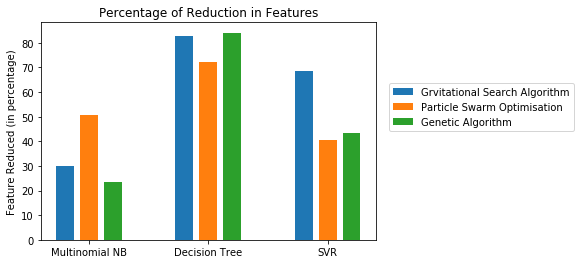

In [43]:
print("Total Features: ",str(n))
fs_names = ['Multinomial NB','Decision Tree','SVR']
xpos = np.arange(len(fs_names))
plt.bar(xpos-0.2,fr[0],width=0.15,label="Grvitational Search Algorithm")
plt.bar(xpos,fr[1],width=0.15,label="Particle Swarm Optimisation")
plt.bar(xpos+0.2,fr[2],width=0.15,label="Genetic Algorithm")
plt.xticks(xpos,fs_names,rotation='horizontal')
plt.ylabel("Feature Reduced (in percentage)")
plt.title("Percentage of Reduction in Features")
plt.legend(loc=(1.04,0.5))
plt.show()

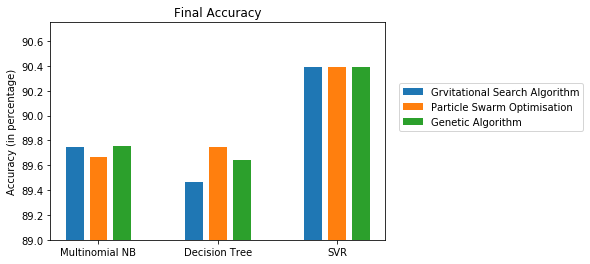

In [72]:
fs_names = ['Multinomial NB','Decision Tree','SVR']
xpos = np.arange(len(fs_names))
plt.bar(xpos-0.2,new_gsa_acc,width=0.15,label="Grvitational Search Algorithm")
plt.bar(xpos,new_pso_acc,width=0.15,label="Particle Swarm Optimisation")
plt.bar(xpos+0.2,new_ga_acc,width=0.15,label="Genetic Algorithm")
plt.xticks(xpos,fs_names,rotation='horizontal')
plt.ylabel("Accuracy (in percentage)")
plt.ylim(89,90.75)
plt.title("Final Accuracy")
plt.legend(loc=(1.04,0.5))
plt.show()

Total Features:  11538


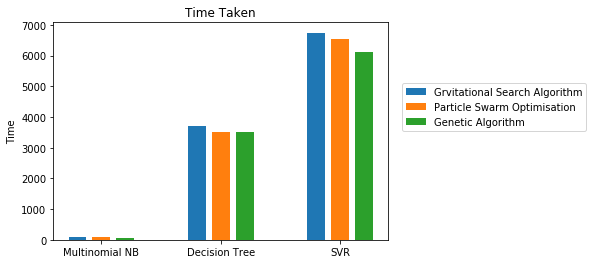

In [116]:
print("Total Features: ",str(n))
fs_names = ['Multinomial NB','Decision Tree','SVR']
xpos = np.arange(len(fs_names))
plt.bar(xpos-0.2,new_gsa_time,width=0.15,label="Grvitational Search Algorithm")
plt.bar(xpos,new_pso_time,width=0.15,label="Particle Swarm Optimisation")
plt.bar(xpos+0.2,new_ga_time,width=0.15,label="Genetic Algorithm")
plt.xticks(xpos,fs_names,rotation='horizontal')
plt.ylabel("Time")
plt.title("Time Taken")
plt.legend(loc=(1.04,0.5))
plt.show()

In [129]:
def win_score(acc,fr,time):
    return (((acc**2) * fr))

In [130]:
winscore = []
for i in range(0,len(models)):
    row = output[i]
    winscore.append(win_score(row[3],row[2],row[4]))
winscore = (winscore/max(winscore))*100

In [131]:
output = []
n = len(features)
headers = ['MODEL','Features Selected','Feature Reduced','Final Accuracy','Time Taken','Win Score']
models = ['MMB + GSA','MMB + PSO','MMB + GA','DT + GSA','DT + PSO','DT + GA','SVR + GSA','SVR + PSO','SVR + GA']
for i in range(0,len(models)):
    j = int(i/3)
    if i%3 == 0:
        row = [models[i],n-new_gsa_fr[j],new_gsa_fr[j],new_gsa_acc[j],round(new_gsa_time[j]/60,2),round(winscore[i],2)]
    elif i%3 == 1:
        row = [models[i],n-new_pso_fr[j],new_pso_fr[j],new_pso_acc[j],round(new_pso_time[j]/60,2),round(winscore[i],2)]
    else :
        row = [models[i],n-new_ga_fr[j],new_ga_fr[j],new_ga_acc[j],round(new_ga_time[j]/60,2),round(winscore[i],2)]
    output.append(row)

In [132]:
from tabulate import tabulate
print(tabulate(output,headers, tablefmt="github"))

| MODEL     |   Features Selected |   Feature Reduced |   Final Accuracy |   Time Taken |   Win Score |
|-----------|---------------------|-------------------|------------------|--------------|-------------|
| MMB + GSA |              8094.4 |            3443.6 |          89.744  |         1.55 |       35.56 |
| MMB + PSO |              5687.6 |            5850.4 |          89.6632 |         1.33 |       60.31 |
| MMB + GA  |              8841   |            2697   |          89.7575 |         1.2  |       27.86 |
| DT + GSA  |              2007.4 |            9530.6 |          89.4667 |        61.81 |       97.82 |
| DT + PSO  |              3228.4 |            8309.6 |          89.7482 |        58.41 |       85.83 |
| DT + GA   |              1833   |            9705   |          89.6415 |        58.53 |      100    |
| SVR + GSA |              3617.8 |            7920.2 |          90.3895 |       112.42 |       82.98 |
| SVR + PSO |              6855   |            4683   |         